In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
data = pd.read_csv(r"loans_kayıp.csv")
data.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672.0,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794.0,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734.0,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518.0,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,NaN,1,11415,2010-07-07,2012-05-21,3.13


In [23]:
data.describe()

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,430.000000,443.000000,443.000000,443.000000
mean,38911.060948,7927.553488,0.534989,11017.101580,3.217156
std,7768.681063,4170.217861,0.499338,581.826222,2.397168
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4147.500000,0.000000,10507.500000,1.220000
50%,39505.000000,8287.500000,1.000000,11033.000000,2.780000
75%,46109.000000,11648.500000,1.000000,11526.000000,4.750000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


In [24]:
data.isnull().sum()

client_id       0
loan_type       0
loan_amount    13
repaid          0
loan_id         0
loan_start      0
loan_end        0
rate            0
dtype: int64

In [27]:

#data["loan_amount"]

from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values = np.nan, strategy = "mean")
missing_data = data["loan_amount"].values
missing_data = missing_data.reshape(len(missing_data),1)
imputer = imputer.fit(missing_data)
data["loan_amount"] = imputer.transform(missing_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    float64
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 27.8+ KB


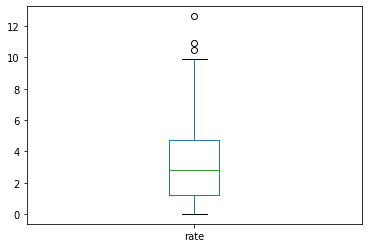

In [125]:
# data with autliers

#data["loan_amount"].plot(kind = "box")
data["rate"].plot(kind = "box")
data["out_rate"] = data["rate"]**0.5


<AxesSubplot:>

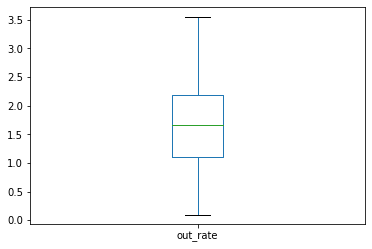

In [126]:
data["out_rate"].plot(kind = "box")

<AxesSubplot:>

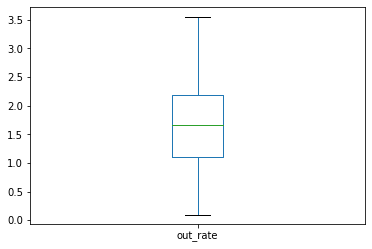

In [127]:
data['log_rate'] = np.log(data['rate'])
data["out_rate"].plot(kind = "box")

In [7]:
#Encoding the Categorical Features

data['loan_type'] = data['loan_type'].astype('category')
data.info()




pd.unique(data['loan_type'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   client_id    443 non-null    int64   
 1   loan_type    443 non-null    category
 2   loan_amount  430 non-null    float64 
 3   repaid       443 non-null    int64   
 4   loan_id      443 non-null    int64   
 5   loan_start   443 non-null    object  
 6   loan_end     443 non-null    object  
 7   rate         443 non-null    float64 
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 25.0+ KB


['home', 'credit', 'cash', 'other']
Categories (4, object): ['home', 'credit', 'cash', 'other']

In [5]:
data.loan_type.head()

0      home
1    credit
2      home
3      cash
4    credit
Name: loan_type, dtype: object

In [136]:
data_dummy = pd.get_dummies(data["loan_type"])
data1 = pd.concat([data,data_dummy],axis = 1)
data1 = data1.drop(["loan_type"],axis = 1)
data1

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,out_rate,log_rate,cash,credit,home,other
0,46109,13672.000000,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,0,0,1,0
1,46109,9794.000000,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,0,1,0,0
2,46109,12734.000000,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,0,0,1,0
3,46109,12518.000000,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,1,0,0,0
4,46109,7927.553488,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,26945,12963.000000,0,10330,2001-11-26,2004-06-11,2.46,1.568439,0.900161,0,0,0,1
439,26945,1728.000000,1,10248,2004-01-27,2005-06-21,5.27,2.295648,1.662030,0,1,0,0
440,26945,9329.000000,0,10154,2001-12-17,2004-07-22,5.65,2.376973,1.731656,0,0,0,1
441,26945,4197.000000,0,10333,2003-10-16,2005-07-10,4.50,2.121320,1.504077,0,0,1,0
